In [2]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/110.9 kB ? eta -:--:--
   ------------------------------------ --- 102.4/110.9 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 110.9/110.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/88.4 kB ? eta -:--:--
   ---------------------------------------- 88.4/88.4 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load dataset
df = pd.read_csv("Customer.csv")  # Update with your file path

# Filter Pune customers (Delivery_person_ID starts with 'PUNERES')
pune_customers = df[df['Delivery_person_ID'].str.startswith("PUNERES")]

# Select relevant features
pune_customers = pune_customers[['Delivery_location_latitude', 'Delivery_location_longitude']].dropna()

# Create base map centered around Pune
pune_map = folium.Map(location=[18.5204, 73.8567], zoom_start=12)

# Add heatmap
heat_data = pune_customers.values.tolist()
HeatMap(heat_data).add_to(pune_map)

# Save and display the map
pune_map.save("pune_customer_heatmap.html")
pune_map


In [10]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import DBSCAN
from folium.plugins import MarkerCluster

# Load the dataset (Ensure 'df_pune' contains only Pune deliveries)
df = pd.read_csv("Zomato.csv")  # Replace with actual dataset path
df_pune = df[df['Delivery_person_ID'].str.startswith("PUNERES")]

# Extract customer delivery locations
customer_locations = df_pune[['Delivery_location_latitude', 'Delivery_location_longitude']].dropna()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust 'eps' based on density
customer_locations['Cluster'] = dbscan.fit_predict(customer_locations)

# Create a Folium map centered around Pune
map_center = [customer_locations['Delivery_location_latitude'].mean(), 
              customer_locations['Delivery_location_longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add clusters to map
marker_cluster = MarkerCluster().add_to(m)

for _, row in customer_locations.iterrows():
    folium.CircleMarker(
        location=[row['Delivery_location_latitude'], row['Delivery_location_longitude']],
        radius=5,
        color='blue' if row['Cluster'] == -1 else 'red',  # Noise points in blue, clusters in red
        fill=True,
        fill_color='red' if row['Cluster'] != -1 else 'blue'
    ).add_to(marker_cluster)

# Show map
m


In [12]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   --------------------------------------  317.4/323.6 kB 19.2 MB/s eta 0:00:01
   --------------------------------------  317.4/323.6 kB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.4/16.2 MB 29.2 MB/s eta 0:00:01
   -------- ------------------------------- 3.5/16.2 MB 38.0 MB/s eta 0:00:01
   ------------- -------------------------- 5.3/16.2 MB 37.7 MB/s eta 0:00:01
   ----------------- ---------------------- 7.3/16.2 MB 38.8 MB/s eta 0:00:01
   ------------------------- -------------- 10.2/16.2 MB 43.5 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 50.4 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 54.4 MB/s eta 


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install geopandas folium scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


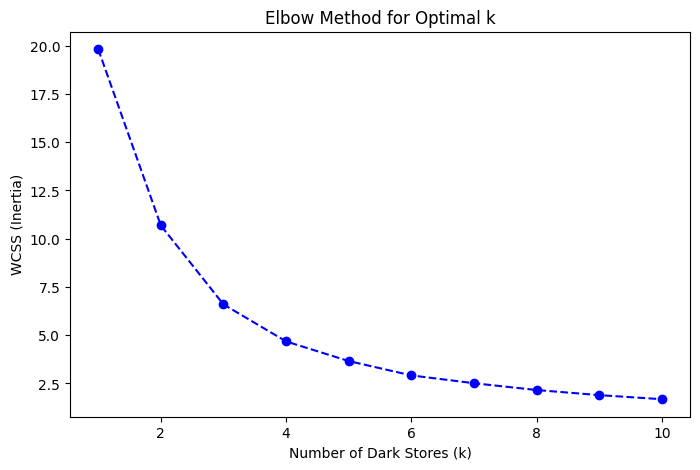

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Extract customer latitude & longitude
customer_locations = df[['Delivery_location_latitude', 'Delivery_location_longitude']].dropna().values

# Test different values of k
wcss = []
K_range = range(1, 11)  # Checking for k from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_locations)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()


Optimal number of dark stores (k): 3


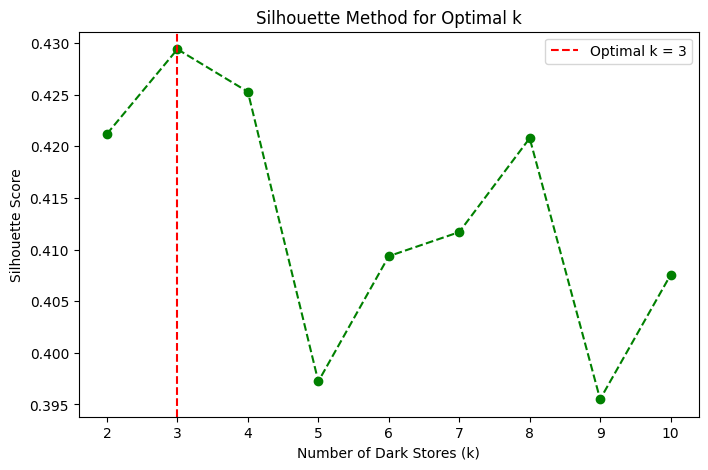

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_scores = []
k_values = range(2, 11)  # k must be at least 2

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(customer_locations)
    score = silhouette_score(customer_locations, labels)
    silhouette_scores.append(score)

# Find optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of dark stores (k): {optimal_k}")

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.axvline(optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point, MultiPoint
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Load customer demand data (Replace with actual dataset)
# df = pd.read_csv("customer_data.csv")  # Ensure it contains latitude & longitude

# Extract customer latitude & longitude
customer_locations = df[['Delivery_location_latitude', 'Delivery_location_longitude']].dropna().values

# Apply K-Means Clustering
# num_stores = 17  # Define number of dark stores
num_stores = optimal_k
kmeans = KMeans(n_clusters=num_stores, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(customer_locations)

# Get cluster centers (suggested dark store locations)
dark_store_locations = kmeans.cluster_centers_

# Compute Voronoi Diagram
vor = Voronoi(dark_store_locations)

# Convert Voronoi Regions into Polygons
def voronoi_regions(vor):
    polygons = []
    for region in vor.regions:
        if not region or -1 in region:  # Skip invalid regions
            continue
        polygon = [vor.vertices[i] for i in region]
        polygons.append(Polygon(polygon))
    return polygons

voronoi_polygons = voronoi_regions(vor)

# Convert to GeoDataFrame
gdf_voronoi = gpd.GeoDataFrame(geometry=voronoi_polygons)

# Create Pune Map with Dark Stores & Voronoi Regions
pune_center = [18.5204, 73.8567]  # Center map at Pune
m = folium.Map(location=pune_center, zoom_start=12)

# Plot Heatmap for Customer Density
HeatMap(df[['Delivery_location_latitude', 'Delivery_location_longitude']].values, radius=10).add_to(m)

# Plot Voronoi Regions on Map
for polygon in gdf_voronoi.geometry:
    geojson = gpd.GeoSeries([polygon]).__geo_interface__
    folium.GeoJson(geojson, style_function=lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1}).add_to(m)

# Draw Cluster Boundaries with Dashed Lines
for i in range(num_stores):
    cluster_points = df[df['cluster'] == i][['Delivery_location_latitude', 'Delivery_location_longitude']].values
    if len(cluster_points) > 2:
        hull = MultiPoint(cluster_points).convex_hull
        folium.PolyLine(list(hull.exterior.coords), color="black", weight=2, dash_array="5, 5").add_to(m)

# Plot Dark Store Locations
for idx, loc in enumerate(dark_store_locations):
    folium.Marker(
        location=[loc[0], loc[1]],
        popup=f"Dark Store {idx+1}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)

# Display the Map
m


In [50]:
df['order_count'] = df['order_count'] + 1  # Increment all values by 1
df['order_count'].fillna(1, inplace=True)  # Fill NaN values with 1

C:\Users\HP\AppData\Local\Temp\ipykernel_28732\1645056598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_count'].fillna(1, inplace=True)  # Fill NaN values with 1


In [55]:
# Remove rows with missing latitude or longitude values
df = df.dropna(subset=['Delivery_location_latitude', 'Delivery_location_longitude'])

Locate stores considering customer demand and customer distance 

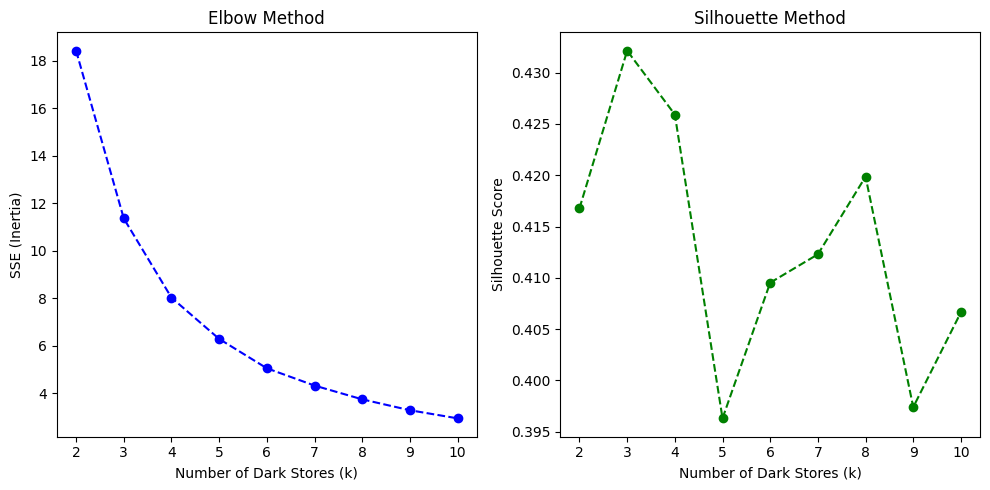

Optimal number of dark stores (k): 3


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, ConvexHull
from sklearn.metrics import silhouette_score
from folium.plugins import HeatMap

# Load Customer Demand Data
df = pd.read_csv("customer_data.csv")  # Ensure columns: 'Delivery_location_latitude', 'Delivery_location_longitude', 'order_count'

# Preprocess Data
df['order_count'] = df['order_count'].fillna(0) + 1  # Fill NaN with 0, then add 1

# Drop rows with missing location data
df = df.dropna(subset=['Delivery_location_latitude', 'Delivery_location_longitude'])

# Extract customer locations & demand weights
customer_locations = df[['Delivery_location_latitude', 'Delivery_location_longitude']].values
customer_weights = df['order_count'].values  # Demand-based weighting

# Determine Optimal k for Clustering
sse = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(customer_locations, sample_weight=customer_weights)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_locations, labels))

# Plot Elbow & Silhouette Method
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel('Number of Dark Stores (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')

plt.tight_layout()
plt.show()

# Select optimal k (Choose highest silhouette score OR elbow point)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of dark stores (k): {optimal_k}")

# optimal_k = 17

#  Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(customer_locations, sample_weight=customer_weights)

# Get cluster centers (Suggested dark store locations)
dark_store_locations = kmeans.cluster_centers_

# Compute Voronoi Diagram for store regions
vor = Voronoi(dark_store_locations)

# Function to get Voronoi regions as polygons
def voronoi_regions(vor):
    polygons = []
    for region in vor.regions:
        if not region or -1 in region:
            continue
        polygon = [vor.vertices[i] for i in region]
        polygons.append(Polygon(polygon))
    return polygons

voronoi_polygons = voronoi_regions(vor)
gdf_voronoi = gpd.GeoDataFrame(geometry=voronoi_polygons)

# Create Pune Map
city_center = [df['Delivery_location_latitude'].mean(), df['Delivery_location_longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=12)

#  Add Customer Density as Heatmap
heat_data = [[lat, lon, weight] for (lat, lon), weight in zip(customer_locations, customer_weights)]
HeatMap(heat_data, radius=12, blur=8, max_zoom=15).add_to(m)

# Plot Voronoi Regions
for polygon in gdf_voronoi.geometry:
    geojson = gpd.GeoSeries([polygon]).__geo_interface__
    folium.GeoJson(geojson, style_function=lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1}).add_to(m)

# Plot Dark Store Locations
for idx, loc in enumerate(dark_store_locations):
    folium.Marker(
        location=[loc[0], loc[1]],
        popup=f"Dark Store {idx+1}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(m)

# Draw Cluster Boundaries with Dashed Lines
for cluster in range(optimal_k):
    cluster_points = df[df['cluster'] == cluster][['Delivery_location_latitude', 'Delivery_location_longitude']].values
    if len(cluster_points) > 2:
        hull = ConvexHull(cluster_points)
        hull_points = [cluster_points[i] for i in hull.vertices] + [cluster_points[hull.vertices[0]]]
        hull_line = LineString(hull_points)
        folium.PolyLine(
            locations=[(p[0], p[1]) for p in hull_line.coords],
            color='black', dash_array='5,5', weight=2
        ).add_to(m)

# Display the Map
m


Locate Stores based on user requirement

In [70]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point, LineString
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, ConvexHull
from sklearn.metrics import silhouette_score
from folium.plugins import HeatMap

# Load Customer Demand Data
df = pd.read_csv("customer_data.csv")  # Ensure this file has 'latitude', 'longitude', 'order_count'

# Preprocess Data: Handle missing values & Adjust demand
df = df.dropna(subset=['Delivery_location_latitude', 'Delivery_location_longitude'])
df['order_count'] = df['order_count'].fillna(0) + 1  # Fill NaN with 0, then add 1 to all

customer_locations = df[['Delivery_location_latitude', 'Delivery_location_longitude']].values
customer_weights = df['order_count'].values  # Demand-based weighting

# Predefine Number of Dark Stores by Category
num_small = 3
num_medium = 2
num_big = 1
num_total_stores = num_small + num_medium + num_big

# Apply Weighted K-Means Clustering
kmeans = KMeans(n_clusters=num_total_stores, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(customer_locations, sample_weight=customer_weights)
cluster_centers = kmeans.cluster_centers_

# Assign dark store categories based on cluster sizes
cluster_sizes = df.groupby('cluster')['order_count'].sum().sort_values(ascending=False).index.tolist()
dark_store_sizes = ['big'] * num_big + ['medium'] * num_medium + ['small'] * num_small
cluster_to_size = {cluster: size for cluster, size in zip(cluster_sizes, dark_store_sizes)}
df['store_size'] = df['cluster'].map(cluster_to_size)

# Compute Voronoi Diagram for store regions
vor = Voronoi(cluster_centers)

def voronoi_regions(vor, points):
    polygons = []
    for region in vor.regions:
        if not region or -1 in region:
            continue
        polygon = [vor.vertices[i] for i in region]
        polygons.append(Polygon(polygon))
    return polygons

gdf_voronoi = gpd.GeoDataFrame(geometry=voronoi_regions(vor, customer_locations))

# Create Map Visualization
city_center = [df['Delivery_location_latitude'].mean(), df['Delivery_location_longitude'].mean()]
m = folium.Map(location=city_center, zoom_start=12)

# Plot Voronoi Regions
for polygon in gdf_voronoi.geometry:
    geojson = gpd.GeoSeries([polygon]).__geo_interface__
    folium.GeoJson(geojson, style_function=lambda x: {'fillColor': 'lightblue', 'color': 'blue', 'weight': 1}).add_to(m)

# Color Code Dark Store Categories
store_colors = {'small': 'green', 'medium': 'orange', 'big': 'red'}

# Plot Dark Stores
for cluster, loc in enumerate(cluster_centers):
    size = cluster_to_size[cluster]
    folium.Marker(
        location=[loc[0], loc[1]],
        popup=f"Dark Store {cluster+1} ({size})",
        icon=folium.Icon(color=store_colors[size], icon='home')
    ).add_to(m)

# Draw Cluster Boundaries with Dashed Lines
for cluster in range(num_total_stores):
    cluster_points = df[df['cluster'] == cluster][['Delivery_location_latitude', 'Delivery_location_longitude']].values
    if len(cluster_points) > 2:
        hull = ConvexHull(cluster_points)
        hull_points = [cluster_points[i] for i in hull.vertices] + [cluster_points[hull.vertices[0]]]
        hull_line = LineString(hull_points)
        folium.PolyLine(locations=[(p[0], p[1]) for p in hull_line.coords],
                        color='black', dash_array='5,5', weight=2).add_to(m)

# Add Heatmap for Customer Density
heat_data = [[row['Delivery_location_latitude'], row['Delivery_location_longitude'], row['order_count']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)

# Display the Map
m


'small': 'green', 'medium': 'orange', 'big': 'red'